<a href="https://colab.research.google.com/github/MartinMarzi/IPMdecisions/blob/main/IPMdecisions_DataExploration_colab_1_4_Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
# # For colab
# %pip install umap-learn
# %pip install hdbscan

In [40]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

from pandas.api.types import CategoricalDtype
import umap
import hdbscan
import sklearn.cluster as cluster
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# pd.set_option('max_columns', None)

In [41]:
#DATA_FILE = "data/Farmers_edited data 21.12.2020_IPS_FINAL- WEKA_JM.xlsx"
DATA_FILE = "/Users/mmarzi/MLprojects/IPMdecisions/data/Consultants_edited-data_21_12_2020_IPS_FINAL-WEKA_JM-izbrani-atributi.xlsx"

In [42]:
# Create dataframe
df = pd.read_excel(DATA_FILE, header=2, engine='openpyxl', na_values=['?'], usecols=range(18), skiprows=range(154,158))
# Show data size
df.shape

(151, 18)

In [43]:
df

,Region_Cat_NO,Country_Cat_NO,Age_Cat_1to3,Gender_1male,Degree_Cat_1to2,Experience_Cat_1to2,Crop_group_Cat_NO,How_often_do_you_use_Cat_1to3,Substitute_or_complement_1Complement,Productivity_improvment_Cat_1to3,Graphics_only,Evidence_required_Cat,Use_same_DSS_than_farmer_Merged1_Cat,Farm_scale_Cat,Speed_internet_Cat,Legislative_requirements_clients,Access_to_marketing_info_about_DSS_Cat,Followed_manufacturers_demo_Cat
0,North_EU,Denmark,2,0,2.0,2.0,1.0,2.0,1.0,3.0,0.0,2.0,1.0,4.0,3.0,1.0,3.0,2.0
1,North_EU,Denmark,2,0,2.0,2.0,1.0,2.0,1.0,3.0,0.0,3.0,1.0,4.0,2.0,1.0,2.0,2.0
2,North_EU,Denmark,1,1,2.0,1.0,1.0,2.0,1.0,2.0,0.0,3.0,1.0,3.0,3.0,1.0,3.0,3.0
3,North_EU,Denmark,2,0,2.0,2.0,1.0,1.0,1.0,3.0,0.0,3.0,1.0,2.0,3.0,1.0,3.0,3.0
4,North_EU,Denmark,3,1,1.0,2.0,1.0,1.0,1.0,3.0,0.0,3.0,1.0,4.0,2.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,South_EU,Greece,1,1,2.0,1.0,NaN,NaN,1.0,2.0,0.0,1.0,2.0,4.0,3.0,NaN,1.0,1.0
147,South_EU,Greece,2,0,2.0,2.0,2.0,2.0,1.0,3.0,0.0,3.0,1.0,1.0,2.0,1.0,2.0,2.0
148,South_EU,Greece,1,1,2.0,1.0,2.0,2.0,1.0,3.0,0.0,3.0,1.0,1.0,2.0,1.0,2.0,1.0
149,South_EU,Greece,1,0,2.0,1.0,1.0,2.0,1.0,3.0,0.0,3.0,1.0,1.0,2.0,1.0,1.0,2.0


In [44]:
# Slice by "Region" = north_EU
# df = df[df.Region_Cat_NO=="North_EU"]
#Slice by "Region_Cat_NO" = Central_EU
df = df[df.Region_Cat_NO=="Central_EU"]
# # Slice by "Region" = South_EU
# df = df[df.Region_Cat_NO=="South_EU"]

In [45]:
# # Remove duplicate features and "Subject" feature.
# dup_feat = ["Subject", "Production_level_1to7", "DSS_for_ShortLongTermBothDecision_Cat_NO", "Prefered_type_Web_Software_Both_Cat_NO", 
#             "Importance_of_easy_to_use_1to7", "Importance_of_easy_to_use_1to2", "Importance_of_efficient_1to7", "Importance_of_efficient_1to2", 
#             "Importance_low_price_1to7", "Importance_low_price_1to2", "Importance_polyvalence_1to7", "Importance_polyvalence_1to2", 
#             "Enjoy_using_new_techs_1to7", "Enjoy_using_new_techs_1to2", "Appreciate_change_1to7", "Appreciate_change_1to2",
#             "Trust_in_DSS_1to7", "Trust_in_DSS_1to2", "Trust_in_colleague_advice_1to7", "Trust_in_colleague_advice_1to2",
#             "Trust_advice_friend_1to7", "Trust_advice_friend_1to2", "Output_preference_Cat_NO"] 
# df_reduced = df.drop(dup_feat, axis=1)

In [46]:
# Remove features
removed_features = ["Country_Cat_NO"]
df_reduced = df.copy().drop(removed_features, axis=1)

In [47]:
pd.options.display.max_rows = 15

In [48]:
df_reduced

,Region_Cat_NO,Age_Cat_1to3,Gender_1male,Degree_Cat_1to2,Experience_Cat_1to2,Crop_group_Cat_NO,How_often_do_you_use_Cat_1to3,Substitute_or_complement_1Complement,Productivity_improvment_Cat_1to3,Graphics_only,Evidence_required_Cat,Use_same_DSS_than_farmer_Merged1_Cat,Farm_scale_Cat,Speed_internet_Cat,Legislative_requirements_clients,Access_to_marketing_info_about_DSS_Cat,Followed_manufacturers_demo_Cat
5,Central_EU,2,0,2.0,1.0,1.0,1.0,1.0,3.0,NaN,3.0,NaN,4.0,2.0,1.0,2.0,3.0
6,Central_EU,2,0,2.0,2.0,1.0,2.0,1.0,3.0,0.0,3.0,1.0,3.0,2.0,1.0,2.0,3.0
7,Central_EU,2,1,2.0,2.0,1.0,2.0,1.0,2.0,0.0,2.0,1.0,4.0,2.0,1.0,1.0,2.0
8,Central_EU,2,1,2.0,2.0,1.0,2.0,1.0,2.0,0.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0
9,Central_EU,2,0,2.0,2.0,1.0,1.0,1.0,2.0,0.0,2.0,NaN,NaN,2.0,1.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,Central_EU,1,0,2.0,1.0,3.0,3.0,1.0,2.0,0.0,3.0,2.0,4.0,2.0,1.0,2.0,2.0
124,Central_EU,2,1,NaN,NaN,NaN,3.0,1.0,1.0,1.0,2.0,1.0,4.0,3.0,1.0,2.0,3.0
125,Central_EU,1,1,2.0,1.0,3.0,3.0,1.0,2.0,0.0,3.0,2.0,2.0,2.0,1.0,2.0,2.0
126,Central_EU,2,1,2.0,2.0,3.0,3.0,1.0,3.0,1.0,3.0,1.0,4.0,3.0,1.0,2.0,2.0


In [49]:
# # If no ohe
ohe_df = df_reduced.copy()

# One hot encode categorical data.
# ohe_df = pd.get_dummies(df_reduced, columns=["Region_Cat_NO", "Crop_group_Cat_NO"])

# One hot encode categorical data by region.
# ohe_df = pd.get_dummies(df_reduced, columns=["Crop_group_Cat_NO"])

In [50]:
pd.options.display.max_rows = 20
ohe_df

,Region_Cat_NO,Age_Cat_1to3,Gender_1male,Degree_Cat_1to2,Experience_Cat_1to2,Crop_group_Cat_NO,How_often_do_you_use_Cat_1to3,Substitute_or_complement_1Complement,Productivity_improvment_Cat_1to3,Graphics_only,Evidence_required_Cat,Use_same_DSS_than_farmer_Merged1_Cat,Farm_scale_Cat,Speed_internet_Cat,Legislative_requirements_clients,Access_to_marketing_info_about_DSS_Cat,Followed_manufacturers_demo_Cat
5,Central_EU,2,0,2.0,1.0,1.0,1.0,1.0,3.0,NaN,3.0,NaN,4.0,2.0,1.0,2.0,3.0
6,Central_EU,2,0,2.0,2.0,1.0,2.0,1.0,3.0,0.0,3.0,1.0,3.0,2.0,1.0,2.0,3.0
7,Central_EU,2,1,2.0,2.0,1.0,2.0,1.0,2.0,0.0,2.0,1.0,4.0,2.0,1.0,1.0,2.0
8,Central_EU,2,1,2.0,2.0,1.0,2.0,1.0,2.0,0.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0
9,Central_EU,2,0,2.0,2.0,1.0,1.0,1.0,2.0,0.0,2.0,NaN,NaN,2.0,1.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,Central_EU,1,0,2.0,1.0,3.0,3.0,1.0,2.0,0.0,3.0,2.0,4.0,2.0,1.0,2.0,2.0
124,Central_EU,2,1,NaN,NaN,NaN,3.0,1.0,1.0,1.0,2.0,1.0,4.0,3.0,1.0,2.0,3.0
125,Central_EU,1,1,2.0,1.0,3.0,3.0,1.0,2.0,0.0,3.0,2.0,2.0,2.0,1.0,2.0,2.0
126,Central_EU,2,1,2.0,2.0,3.0,3.0,1.0,3.0,1.0,3.0,1.0,4.0,3.0,1.0,2.0,2.0


### Missing values

In [51]:
# Show Missing values
ohe_df.isnull().sum()

Region_Cat_NO                              0
Age_Cat_1to3                               0
Gender_1male                               0
Degree_Cat_1to2                            3
Experience_Cat_1to2                        4
Crop_group_Cat_NO                          1
How_often_do_you_use_Cat_1to3              2
Substitute_or_complement_1Complement       1
Productivity_improvment_Cat_1to3           2
Graphics_only                              4
Evidence_required_Cat                      2
Use_same_DSS_than_farmer_Merged1_Cat      11
Farm_scale_Cat                             3
Speed_internet_Cat                         2
Legislative_requirements_clients           2
Access_to_marketing_info_about_DSS_Cat     3
Followed_manufacturers_demo_Cat            2
dtype: int64

In [52]:
ohe_df_reduced = ohe_df.copy().drop(["Region_Cat_NO", "Use_same_DSS_than_farmer_Merged1_Cat"], axis=1)

In [53]:
df_noNaN = ohe_df_reduced.dropna(how="any").copy()
#df_noNaN = ohe_df.copy().fillna(ohe_df.mean())
#df_noNaN = ohe_df.copy().fillna(ohe_df.median())
#df_noNaN = ohe_df.copy().fillna(ohe_df.mode())
#df_noNaN = ohe_df.interpolate(method="linear", axis=0).copy()
#df_noNaN = df.dropna(how="any").copy()

In [54]:
df_noNaN = df_noNaN.astype("int64")
df_noNaN.shape

(46, 15)

In [55]:
df_noNaN

,Age_Cat_1to3,Gender_1male,Degree_Cat_1to2,Experience_Cat_1to2,Crop_group_Cat_NO,How_often_do_you_use_Cat_1to3,Substitute_or_complement_1Complement,Productivity_improvment_Cat_1to3,Graphics_only,Evidence_required_Cat,Farm_scale_Cat,Speed_internet_Cat,Legislative_requirements_clients,Access_to_marketing_info_about_DSS_Cat,Followed_manufacturers_demo_Cat
6,2,0,2,2,1,2,1,3,0,3,3,2,1,2,3
7,2,1,2,2,1,2,1,2,0,2,4,2,1,1,2
8,2,1,2,2,1,2,1,2,0,2,2,2,1,2,2
10,3,1,2,2,1,2,1,3,1,2,2,2,1,2,2
11,2,0,2,2,1,2,1,2,1,2,4,2,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,2,0,2,2,1,1,1,3,0,3,4,2,1,2,2
123,1,0,2,1,3,3,1,2,0,3,4,2,1,2,2
125,1,1,2,1,3,3,1,2,0,3,2,2,1,2,2
126,2,1,2,2,3,3,1,3,1,3,4,3,1,2,2


### Separating dataframes with ordinal and non-ordinal categorical data

In [56]:
# Adapted for Question #1 "Already_used_DSS"
# List of ordinal features
ord_feat = ["Age_Cat_1to3", "Degree_Cat_1to2", "Experience_Cat_1to2", "How_often_do_you_use_Cat_1to3", "Productivity_improvment_Cat_1to3", 
           "Evidence_required_Cat", "Farm_scale_Cat", "Speed_internet_Cat", "Access_to_marketing_info_about_DSS_Cat", "Followed_manufacturers_demo_Cat"]

# No numeric features

# df with ordinal features only
ord_df = df_noNaN[ord_feat]

# Extract column names
all_col_names = list(df_noNaN.columns)
ord_col_names = list(ord_df.columns)
nom_col_names = [_ for _ in all_col_names if _ not in ord_col_names]

# List of nominal features
nom_feat = nom_col_names.copy()

# df with nominal features only 
nom_df = df_noNaN[nom_col_names]

In [57]:
# ord_df
nom_df

,Gender_1male,Crop_group_Cat_NO,Substitute_or_complement_1Complement,Graphics_only,Legislative_requirements_clients
6,0,1,1,0,1
7,1,1,1,0,1
8,1,1,1,0,1
10,1,1,1,1,1
11,0,1,1,1,1
...,...,...,...,...,...
93,0,1,1,0,1
123,0,3,1,0,1
125,1,3,1,0,1
126,1,3,1,1,1


# Dimensionality reduction

### Ordinal features

Text(0.5, 1.0, 'UMAP projection of ordinal IPM consultant data')

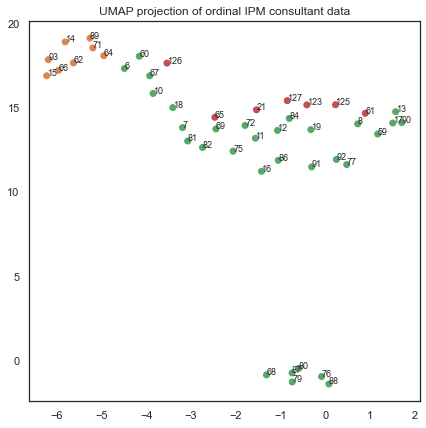

In [58]:
# Standardisation
scaled_array = StandardScaler().fit_transform(ord_df)
scaled_df = pd.DataFrame(scaled_array, columns=ord_df.columns)

# Mapping
reducer = umap.UMAP(n_neighbors=5, min_dist=0.5, n_components=2, metric="euclidean", random_state=123)
ord_embedding = reducer.fit_transform(scaled_df)

sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})
fig, ax = plt.subplots(figsize=(7,7))
xs = ord_embedding[:, 0]
ys = ord_embedding[:, 1] 

ax.scatter(xs, ys, c=[sns.color_palette()[int(x)] for x in ord_df['How_often_do_you_use_Cat_1to3']])
for i, val in enumerate(df_noNaN.index):
#for i, val in enumerate(df_noNaN["Income_Cat"].values.tolist()):
    ax.annotate(str(int(val)), (xs[i], ys[i]), fontsize=9)
plt.title('UMAP projection of ordinal IPM consultant data')

### Nominal features

/Users/mmarzi/.pyenv/versions/3.8.0/envs/graphs/lib/python3.8/site-packages/umap/umap_.py:1760: UserWarning: gradient function is not yet implemented for hamming distance metric; inverse_transform will be unavailable
  warn(


Text(0.5, 1.0, 'UMAP projection of nominal IPM consultant data')

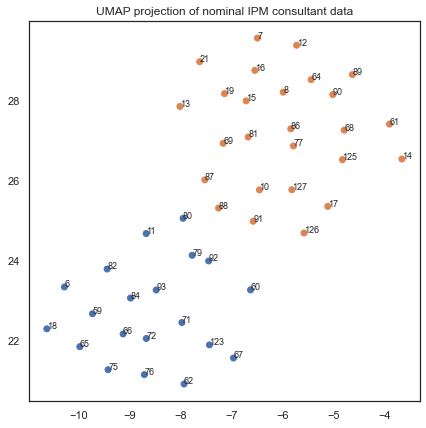

In [59]:
# scaled_array = StandardScaler().fit_transform(nom_df)
# scaled_df = pd.DataFrame(scaled_array, columns=nom_df.columns)

reducer = umap.UMAP(n_neighbors=10, min_dist=0.9, n_components=2, metric="hamming", random_state=123)
nom_embedding = reducer.fit_transform(nom_df)

fig, ax = plt.subplots(figsize=(7,7))
xs = nom_embedding[:, 0]
ys = nom_embedding[:, 1] 

ax.scatter(xs, ys, c=[sns.color_palette()[int(x)] for x in df_noNaN["Gender_1male"]])

for i, val in enumerate(df_noNaN.index):
#for i, val in enumerate(df_noNaN['Income_Cat'].values.tolist()):
    ax.annotate(str(int(val)), (xs[i], ys[i]), fontsize=9)
plt.title('UMAP projection of nominal IPM consultant data')

# naredi for loop da odstranjaš posamično atribute

### Combine nominal and ordinal/numeric feature maps

In [60]:
# combine mappings
intersection_embedding = nom_embedding * ord_embedding
union_embedding = nom_embedding + ord_embedding

In [61]:
# # coloring according to region
# colors = []
# for index, data in df_noNaN.iterrows():
#     if data["Region_Cat_NO_North_EU"]  == 1:
#         colors.append("red")
#     elif data ["Region_Cat_NO_Central_EU"] == 1:
#         colors.append("green")
#     elif data ["Region_Cat_NO_South_EU"] == 1:
#         colors.append("blue")
#     else:
#         raise ValueError("invalid ohe")

Text(0.5, 1.0, 'UMAP projection of IPM consultant intersection data')

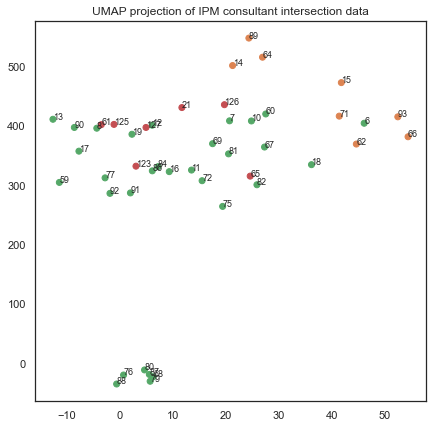

In [62]:
# plot intersection 2D embedding
fig, ax = plt.subplots(figsize=(7,7))
xs = intersection_embedding[:, 0]
ys = intersection_embedding[:, 1] 

ax.scatter(xs, ys, c=[sns.color_palette()[int(x)] for x in ord_df['How_often_do_you_use_Cat_1to3']])

for i, val in enumerate(df_noNaN.index):
#for i, val in enumerate(df_noNaN['Income_Cat'].values.tolist()):
    ax.annotate(str(int(val)), (xs[i], ys[i]), fontsize=9)
plt.title('UMAP projection of IPM consultant intersection data')

Text(0.5, 1.0, 'UMAP projection of IPM consultant union data')

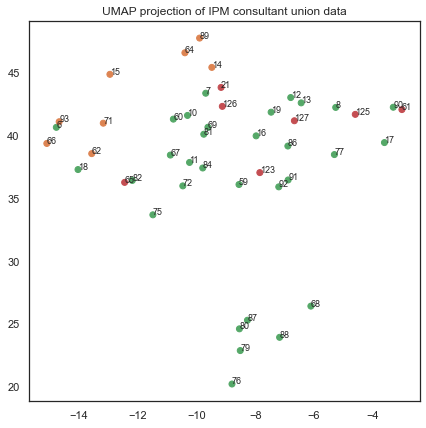

In [63]:
# plot union 2D embedding
fig, ax = plt.subplots(figsize=(7,7))
xs = union_embedding[:, 0]
ys = union_embedding[:, 1] 

ax.scatter(xs, ys, c=[sns.color_palette()[int(x)] for x in df_noNaN['How_often_do_you_use_Cat_1to3']])
# ax.scatter(xs, ys, c=colors) 


for i, val in enumerate(df_noNaN.index):
#for i, val in enumerate(df_noNaN['Income_Cat'].values.tolist()):
    ax.annotate(str(int(val)), (xs[i], ys[i]), fontsize=9)
plt.title('UMAP projection of IPM consultant union data')

# CLUSTERING

Text(0.5, 1.0, 'K-means clusters of UMAP projection of IPM consultant intersection data')

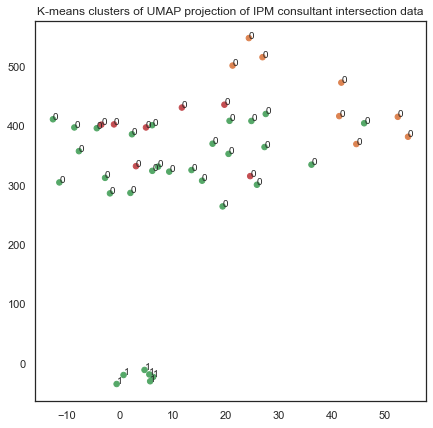

In [64]:
# k-means clustering 2D intersection emnbedding
km_2D_inters_clusters = cluster.KMeans(n_clusters=2).fit_predict(intersection_embedding)

# plot
fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(intersection_embedding[:, 0], intersection_embedding[:, 1], c=[sns.color_palette()[int(x)] for x in df_noNaN['How_often_do_you_use_Cat_1to3']], s=30, cmap='cool')
# ax.scatter(intersection_embedding[:, 0], intersection_embedding[:, 1], c=colors, s=30, cmap='cool')

# Add cluster text
for i, val in enumerate(km_2D_inters_clusters.tolist()):
    ax.annotate(str(int(val)), (intersection_embedding[:, 0][i], intersection_embedding[:, 1][i]), fontsize=10)
plt.title('K-means clusters of UMAP projection of IPM consultant intersection data')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'HDBscan clusters of UMAP projection of IPM consultant intersection data')

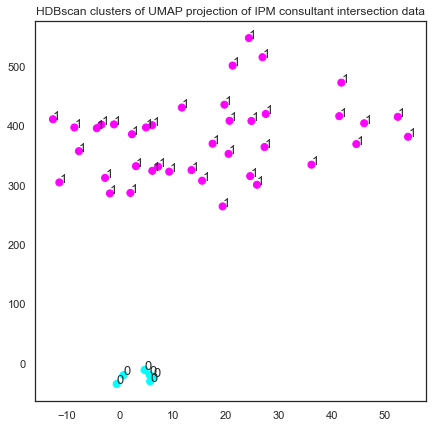

In [65]:
# hdbscan clustering 2D intersection emnbedding
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, min_samples=4)
hdbscan_2D_inters_clusters = clusterer.fit_predict(intersection_embedding)

fig, ax = plt.subplots(figsize=(7,7))

clustered = (hdbscan_2D_inters_clusters >= 0)
ax.scatter(intersection_embedding[~clustered, 0],
            intersection_embedding[~clustered, 1],
            c=(0.5, 0.5, 0.5),
            s=50,
            alpha=0.3)

ax.scatter(intersection_embedding[clustered, 0],
            intersection_embedding[clustered, 1],
            c=hdbscan_2D_inters_clusters[clustered],
            s=50,
            cmap='cool')

# ax.scatter(intersection_embedding[clustered, 0],
#             intersection_embedding[clustered, 1],
#             c=colors,
#             s=50,
#             cmap='cool')

for i, val in enumerate(hdbscan_2D_inters_clusters):
    ax.annotate(str(int(val)), (intersection_embedding[:, 0][i], intersection_embedding[:, 1][i]), fontsize=13)

plt.title('HDBscan clusters of UMAP projection of IPM consultant intersection data')

Text(0.5, 1.0, 'K-means clusters of UMAP projection of IPM consultant union data')

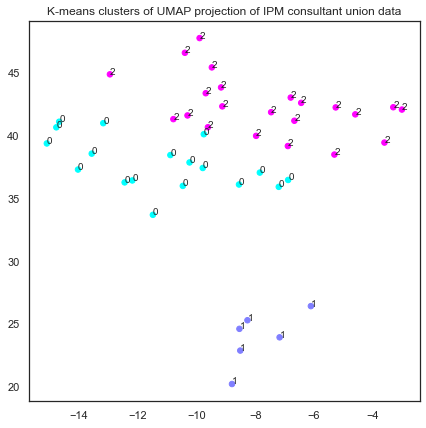

In [66]:
# kmeans clustering 2D union emnbedding
km_2D_union_clusters = cluster.KMeans(n_clusters=3).fit_predict(union_embedding)
#kmeans_labels

fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(union_embedding[:, 0], union_embedding[:, 1], c=km_2D_union_clusters, s=30, cmap='cool')

# daj clustre (številke) gor v umap
for i, val in enumerate(km_2D_union_clusters.tolist()):
    ax.annotate(str(int(val)), (union_embedding[:, 0][i], union_embedding[:, 1][i]), fontsize=10)

plt.title('K-means clusters of UMAP projection of IPM consultant union data')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'HDBscan clusters of UMAP projection of IPM consultant union data')

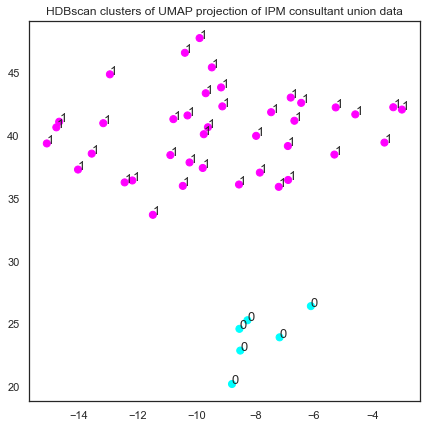

In [67]:
# hdbscan clustering 2D union emnbedding
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, min_samples=4)
hdbscan_2D_union_clusters = clusterer.fit_predict(union_embedding)

fig, ax = plt.subplots(figsize=(7,7))

clustered = (hdbscan_2D_union_clusters >= 0)
ax.scatter(union_embedding[~clustered, 0],
            union_embedding[~clustered, 1],
            c=(0.5, 0.5, 0.5),
            s=50,
            alpha=0.3)

ax.scatter(union_embedding[clustered, 0],
            union_embedding[clustered, 1],
            c=hdbscan_2D_union_clusters[clustered],
            s=50,
            cmap='cool')

for i, val in enumerate(hdbscan_2D_union_clusters):
    ax.annotate(str(int(val)), (union_embedding[:, 0][i], union_embedding[:, 1][i]), fontsize=13)

plt.title('HDBscan clusters of UMAP projection of IPM consultant union data')

## Interactive 3D Visualisation

In [68]:
# # 3D embedding
# ord_reducer3d = umap.UMAP(n_neighbors=5, min_dist=0.1, n_components=3, metric="manhattan", random_state=123)
# ord_embedding3d = ord_reducer3d.fit_transform(ordnum_df)

# nom_reducer3d = umap.UMAP(n_neighbors=5, min_dist=0.1, n_components=3, metric="dice", random_state=123)
# nom_embedding3d = nom_reducer3d.fit_transform(nom_df)

# # combine mappings
# intersection_embedding3d = nom_embedding3d * ord_embedding3d
# union_embedding3d = nom_embedding3d + ord_embedding3d

# # hdbscan
# intersection_clusters = hdbscan.HDBSCAN(min_samples=10, min_cluster_size=10).fit_predict(intersection_embedding3d)
# union_clusters = hdbscan.HDBSCAN(min_samples=10, min_cluster_size=10).fit_predict(union_embedding3d)
# print("intersection_clusters :", intersection_clusters)
# print("union_clusters :", union_clusters)

### Plotly visualisation

In [69]:
# 3D dataframes
intersection3d_df = pd.DataFrame(data=intersection_embedding3d, columns=["x", "y", "z"])
intersection3d_df["clusters"] = list(map(str, intersection_clusters))
union3d_df = pd.DataFrame(data=union_embedding3d, columns=["x", "y", "z"])
union3d_df["clusters"] = list(map(str, union_clusters))

NameError: name 'intersection_embedding3d' is not defined

In [ ]:
# Intersection embedding cluster visualisation 
fig = px.scatter_3d(intersection3d_df, "x","y","z", color="clusters", text=df_noNaN["Already_used_DSS"], opacity=0.8, 
                    title="Intersection 3D embedding of farmers IPM data")
fig.show()

In [ ]:
fig.write_html("IPM_DataEmbedding_q1.html")

In [ ]:
# Union embedding cluster visualisation 
fig = px.scatter_3d(union3d_df, "x","y","z", color="clusters", text=df_noNaN["Already_used_DSS"], opacity=0.5, 
                    title="Union 3D embedding of farmers IPM data")
fig.write_html("output/IPM_Q1.html")
fig.show()

# Cluster explanation 

In [ ]:
# df without ohe, redone form start!
df_noNaN

In [ ]:
# DataFrame for classification with clusters from embedding3d
df_noNaN["clusters"] = hdbscan_2D_inters_clusters
df_clst = df_noNaN.copy()

In [ ]:
df_clst

In [ ]:
# # Export csv with clusters
# df_clst.to_csv("IPM_consultants-data&clusters.csv", sep=",", na_rep="?", index=False)

# Export csv with clusters "Region" = north_EU
# df_clst.to_csv("IPM_consultants-data&clusters_north_EU.csv", sep=",", na_rep="?", index=False)

# # Export csv with clusters "Region" = central_EU
df_clst.to_csv("IPM_consultants-data&clusters_central_EU.csv", sep=",", na_rep="?", index=False)

# Export csv with clusters "Region" = south_EU
# df_clst.to_csv("IPM_consultants-data&clusters_south_EU.csv", sep=",", na_rep="?", index=False)

## Modelling

In [ ]:
from sklearn import tree

target_class = "clusters"
X, y = df_noNaN[[_ for _ in list(ohe_df.columns) if _ not in target_class]], df_noNaN[target_class]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)
tree.plot_tree(clf, feature_names=X.columns, class_names=[str(_) for _ in [0,1,2,3]], filled=True) 

In [ ]:
# Train the model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

target_class = "clusters"
X = df_noNaN[[_ for _ in list(ohe_df.columns) if _ not in target_class]]
y = df_noNaN[target_class]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

In [ ]:
# Predictions for test dataset
y_predict = model.predict(X_test)
y_predict

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf = tree.DecisionTreeClassifier(random_state=0)

target_class = "Already_used_DSS"
X = df_noNaN[[_ for _ in list(ohe_df.columns) if _ not in target_class]]
Y = df_noNaN[target_class]
clf = clf.fit(X, Y)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=2)
decision_tree = decision_tree.fit(X, Y)
r = export_text(decision_tree, feature_names=list(X.columns))
print(r)

In [ ]:
# """Ne morem importat, nek conflict
# import graphviz 
# dot_data = tree.export_graphviz(clf, out_file=None) 
# graph = graphviz.Source(dot_data) 
# graph.render("IPM") 
# """

# create dictionary with value mapping

In [ ]:
# df["test"] = df["Age_Cat"].replace({4:"več kot 50", 3: "test", 1 : "sdfsdf", 2 : "wsf"})
# df["Age_Cat"] = df["Age_Cat"].replace({4:"več kot 50", 3: "test", 1 : "sdfsdf", 2 : "wsf"})